In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/aritr/Downloads/books.csv', error_bad_lines=False)
df.head()

C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\1055263696.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('C:/Users/aritr/Downloads/books.csv', error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.shape

(11123, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
df.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [6]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [7]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [8]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') # Convert data type of publication_date from object into date type
df[df['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


In [9]:
df.loc[df.bookID == 31373, 'publication_date'] = '1999-10-01 00:00:00'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'

In [10]:
df['year'] = pd.DatetimeIndex(df['publication_date']).year # Extract year of publication in a separate column

In [11]:
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True) # Rename the column to remove leading whitespaces

In [12]:
#Check the language codes
df['language_code']=df['language_code'].str.lower()
df.language_code.unique()
df.language_code.value_counts()

eng      8908
en-us    1408
spa       218
en-gb     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

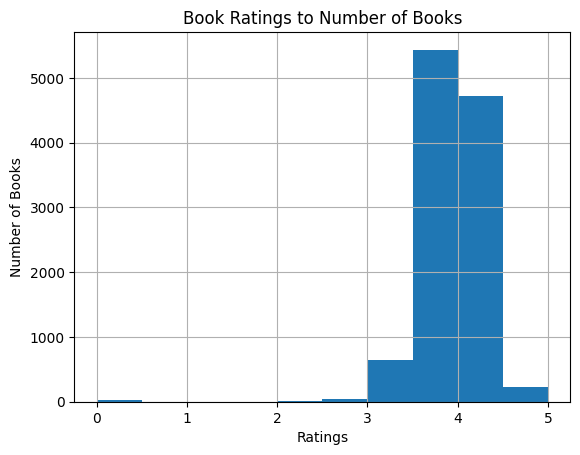

In [13]:
#Bar graphs
df.average_rating.hist()
plt.title("Book Ratings to Number of Books")
plt.xlabel("Ratings")
plt.ylabel("Number of Books")
plt.show()

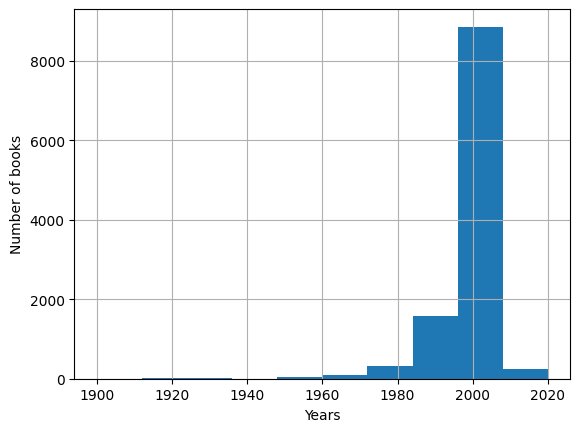

In [14]:
df.year.hist()
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.show()

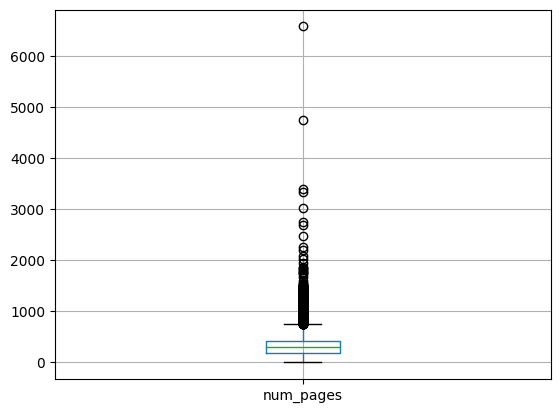

In [15]:
#Box plots
df.boxplot(column='num_pages')
plt.show()

In [16]:
#remove the outliers
df=df.drop(df.index[df['num_pages'] >=1000])

In [17]:
df.corr()

C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,year
bookID,1.000000,-0.031375,-0.002051,-0.012141,-0.076384,-0.080472,0.026328
average_rating,-0.031375,1.000000,0.000291,0.102496,0.038961,0.035334,-0.029612
isbn13,-0.002051,0.000291,1.000000,0.008458,0.006942,0.008911,0.000157
num_pages,-0.012141,0.102496,0.008458,1.000000,0.046999,0.054281,-0.001673
ratings_count,-0.076384,0.038961,0.006942,0.046999,1.000000,0.865418,0.044666
text_reviews_count,-0.080472,0.035334,0.008911,0.054281,0.865418,1.000000,0.067175
year,0.026328,-0.029612,0.000157,-0.001673,0.044666,0.067175,1.000000


C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\89716819.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

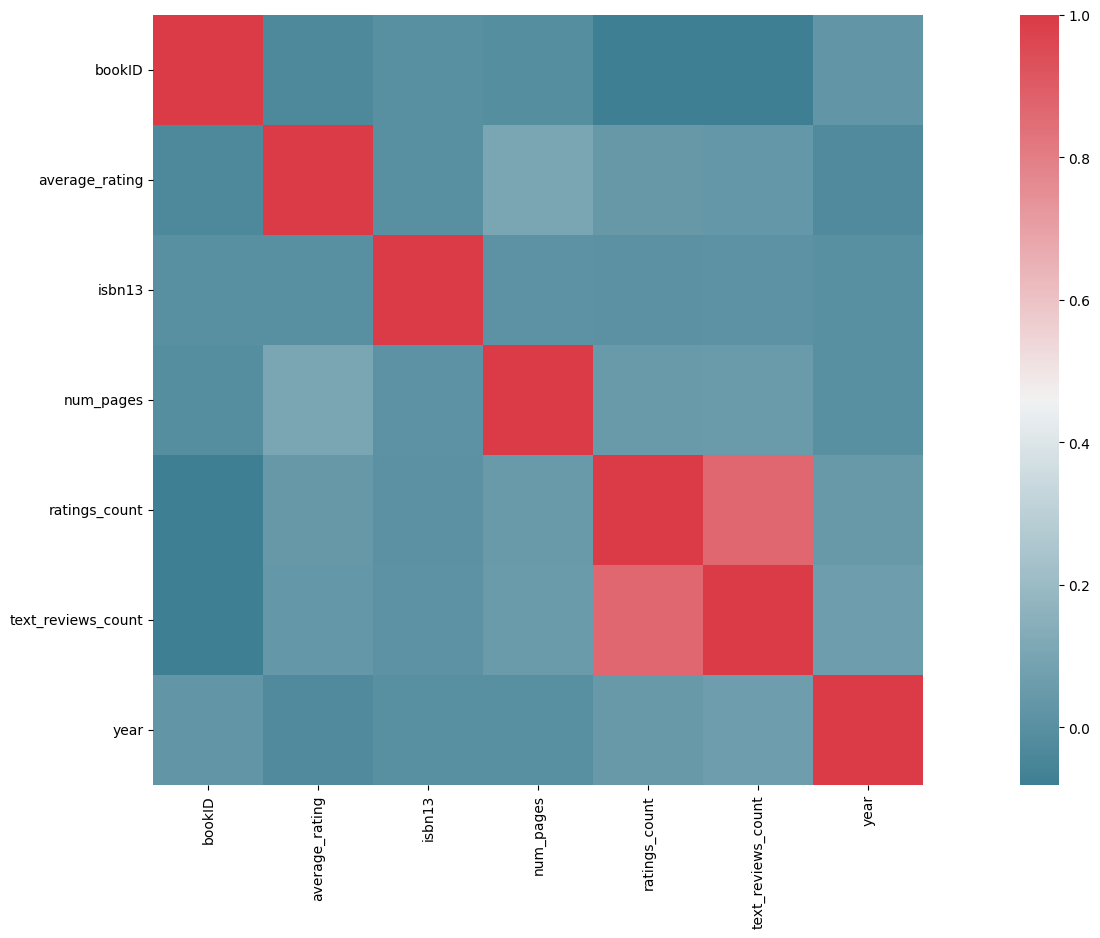

In [18]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

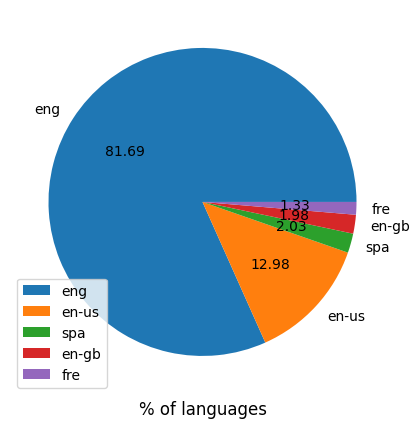

In [19]:
#Categorical columns
#Pie chart
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.language_code.value_counts().head(5).plot(kind='pie',label='', autopct='%.2f', ax=ax1, ).legend()
ax1.set_xlabel('% of languages', size=12)
plt.show()

In [20]:
#Pivot tables
pd.pivot_table(df, index= 'language_code', values='average_rating').sort_values(by='average_rating',ascending=False).head(10)

,average_rating
language_code,
wel,5.000000
gla,4.470000
zho,4.456429
tur,4.420000
ale,4.360000
lat,4.353333
jpn,4.268696
rus,4.255000
nl,4.180000


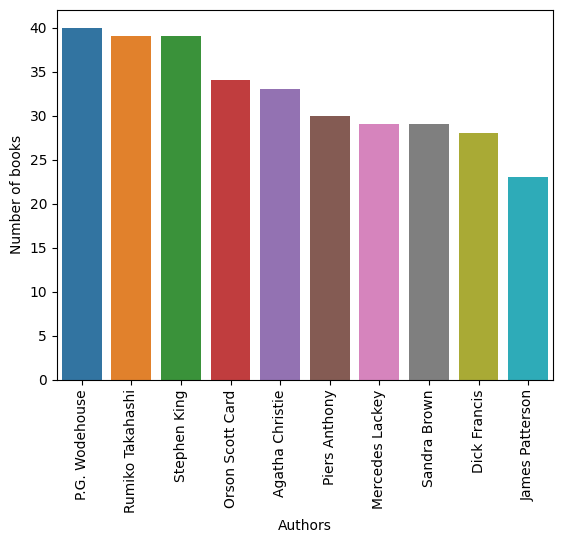

In [21]:
#barplots
chart = sns.barplot(x=df.authors.value_counts().head(10).index, y=df.authors.value_counts().head(10))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Authors")
plt.ylabel("Number of books")
plt.show()

In [22]:
df.sample()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
9195,35963,The Opposite of Fate,Amy Tan,3.92,0007170408,9780007170401,eng,398,172,11,2004-07-01,Harper Perennial,2004


In [23]:
#choose relavant columns
df_model = df[['title', 'authors', 'average_rating', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publisher',
       'year']]

In [24]:
#feature engineering
#encode categorical variables
from sklearn.preprocessing import OrdinalEncoder

encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} # Unify the langauge codes
df_model.replace(encoding, inplace=True)

enc = OrdinalEncoder()
enc.fit(df_model[['language_code']])
df_model[['language_code']] = enc.fit_transform(df_model[['language_code']]) # Apply ordinal encoding on language_code to convert it into numerical column

C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\2150727301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.replace(encoding, inplace=True)
C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\2150727301.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[['language_code']] = enc.fit_transform(df_model[['language_code']]) # Apply ordinal encoding on language_code to convert it into numerical column


In [25]:
#feature engineering
#encode categorical variables (title, authors, publisher)
le = preprocessing.LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])
df_model['authors'] = le.fit_transform(df_model['authors'])
df_model['publisher'] = le.fit_transform(df_model['publisher'])

C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\1568163244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['title'] = le.fit_transform(df_model['title'])
C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\1568163244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['authors'] = le.fit_transform(df_model['authors'])
C:\Users\aritr\AppData\Local\Temp\ipykernel_23472\1568163244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [26]:
df_model.sample()


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
6475,4190,5843,3.73,5.0,242,162,21,889,1993


In [27]:
#train test split
X = df_model.drop(['average_rating'], axis = 1)
y = df_model['average_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [28]:
#Linear regression model
lr=LinearRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

Text(0, 0.5, 'Average Ratings')

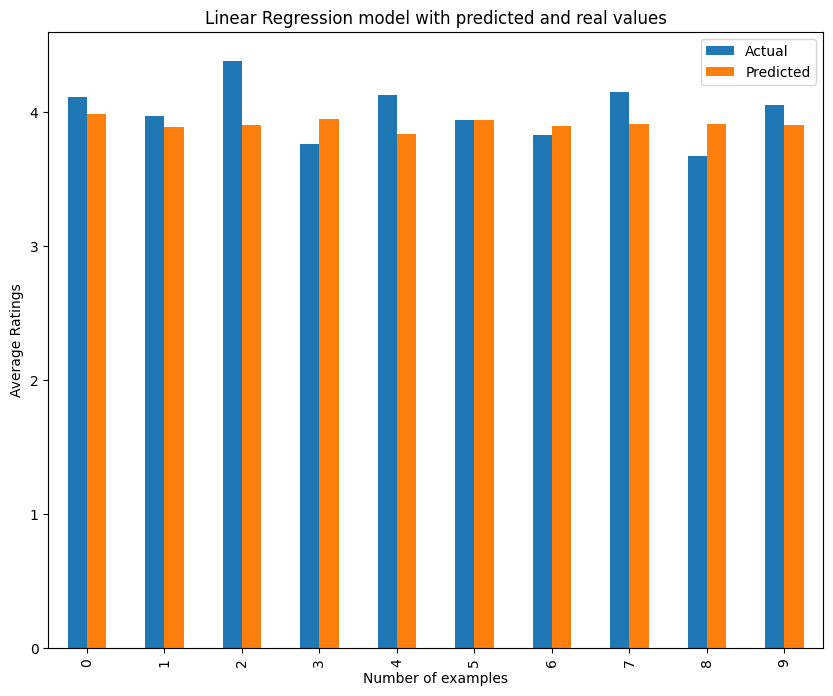

In [29]:
#Barchart
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_lr.tolist()}).head(10)
pred.head(10)
pred.plot(kind='bar', figsize=(10, 8))
plt.title('Linear Regression model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')

In [30]:
#Model Performance Evaluation

print('MSE in Linear Regression train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_lr),
        mean_squared_error(y_test, y_test_pred_lr)))
print('R^2 in Linear Regression train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_lr),
        r2_score(y_test, y_test_pred_lr)))
print('MAE in Linear Regression train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_lr),
        mean_absolute_error(y_test, y_test_pred_lr)))
print('RMSE in Linear Regression train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))))

MSE in Linear Regression train: 0.126, test: 0.099
R^2 in Linear Regression train: 0.016, test: 0.003
MAE in Linear Regression train: 0.231, test: 0.225
RMSE in Linear Regression train: 0.355, test: 0.314


In [31]:
#Random forest
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred_rf = forest.predict(X_train)
y_test_pred_rf = forest.predict(X_test)

Text(0, 0.5, 'Average Ratings')

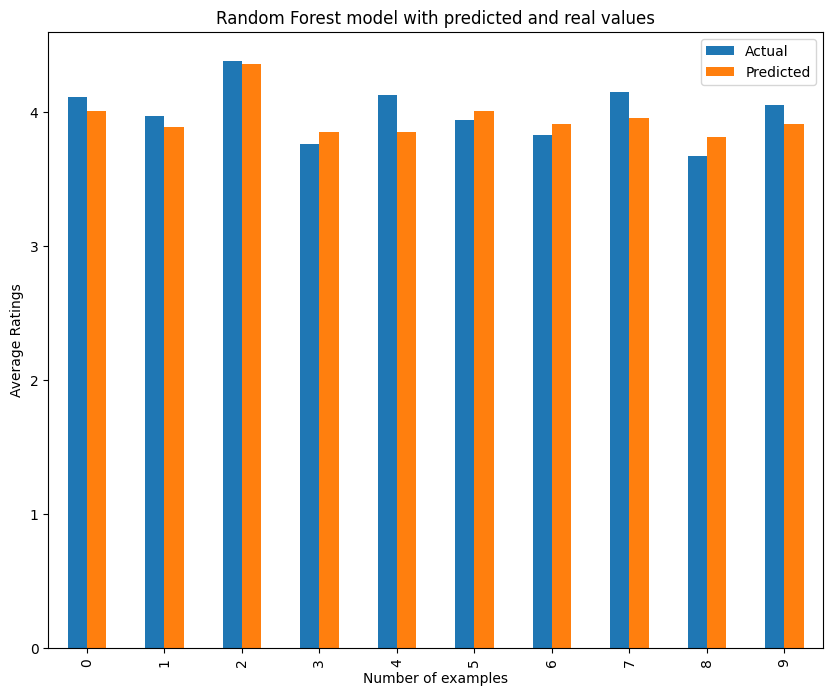

In [32]:
#Bar chat
pred1 = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_rf.tolist()}).head(10)
pred1.head(10)
pred1.plot(kind='bar', figsize=(10, 8))
plt.title('Random Forest model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')

In [33]:
#Model Performance Evaluation

print('MSE in Random Forest train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf)))
print('R^2 in Random Forest train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_test, y_test_pred_rf)))
print('MAE in Random Forest train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_test, y_test_pred_rf)))
print('RMSE in Random Forest train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))))

MSE in Random Forest train: 0.014, test: 0.102
R^2 in Random Forest train: 0.888, test: -0.035
MAE in Random Forest train: 0.079, test: 0.213
RMSE in Random Forest train: 0.120, test: 0.320
